**手动实现的线性回归**

In [17]:
import numpy as np
import torch

def generate_data(w, b, num_data):
    X = torch.normal(0, 1, (num_data, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [18]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, lbls = generate_data(true_w, true_b, 1000)

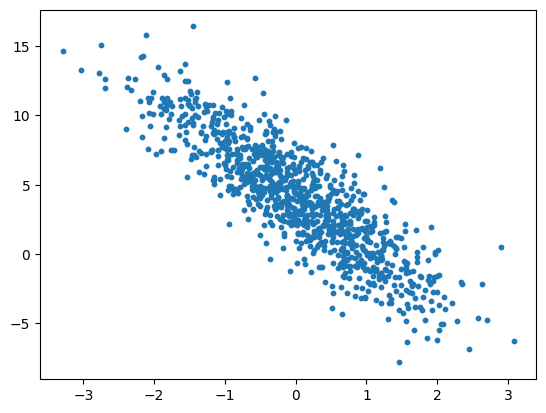

In [19]:
import matplotlib.pyplot as plt

plt.scatter(features[:, (1)], lbls, 10)

In [20]:
import random

def data_iter(seg_size, feats, lbls):

    num_examples = len(feats) # 所有的随机变量
    indices = list(range(num_examples)) # 获得表示随机变量的索引的列表
    random.shuffle(indices)

    for i in range(0, num_examples, seg_size):
        seg_indices = np.array(
            indices[i : min(i + seg_size, num_examples)]
        )

        yield feats[seg_indices], lbls[seg_indices]

In [21]:
batch_size = 10

for X, y in data_iter(batch_size, features, lbls):
    print(X, '\n', y)
    break

tensor([[ 2.2652,  0.6689],
        [-0.4829, -0.1717],
        [-0.9180,  1.0018],
        [-1.0563, -0.5637],
        [-0.7244,  1.2095],
        [-1.0272,  0.6637],
        [ 0.6853, -1.4971],
        [ 0.2239,  0.9876],
        [ 1.0484,  0.2572],
        [-1.9459,  0.3716]]) 
 tensor([[ 6.4543],
        [ 3.8294],
        [-1.0527],
        [ 3.9965],
        [-1.3562],
        [-0.1137],
        [10.6579],
        [ 1.2868],
        [ 5.4241],
        [-0.9478]])


In [22]:
w = torch.normal(0, 0.01, (2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [23]:
def linear_reg(X, w, b):
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [24]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [25]:
lr = .03
num_epochs = 3
net = linear_reg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, lbls):
        l = loss(net(X, w, b), y)
        l.sum().backward() # 反向传播，求到梯度
        sgd((w, b), lr, batch_size)

    with torch.no_grad():
        train_loss = loss(net(features, w, b), lbls)
        print(f'epoch {epoch + 1}, loss {float(train_loss.mean()):f}')

epoch 1, loss 0.045508
epoch 2, loss 0.000180
epoch 3, loss 0.000046


**使用神经网络实现的线性回归**

In [26]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [27]:
# PyTorch 数据迭代器
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [28]:
from torch import nn

net = nn.Sequential(nn.Linear(2, 1))

net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0) # 

tensor([0.])

In [29]:
loss = nn.MSELoss() # 损失函数 平方损失
optim = torch.optim.SGD(net.parameters(), lr=lr) # SGD，传入模型参数

In [31]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        optim.zero_grad()
        l.backward()
        optim.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}: loss {l:f}')

epoch 1: loss 0.000100
epoch 2: loss 0.000101
epoch 3: loss 0.000100
